# 6.1 参数的更新
- SGD
- Momentum
- AdaGrad
- Adam

## 6.1.1 SGD
- 简单但可能没有效率，比如f = 0.05x^2+y^2 
- 梯度方向：可能并不指向最低点
- 局部最小和全局最小

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

def f(x,y):
    return np.power(x,2)/20 + np.power(y,2)

fig1 = plt.figure()
ax  = Axes3D(fig1)
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
x,y = np.meshgrid(x,y)
z = f(x,y)
ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap=plt.cm.coolwarm)
ax.contourf(x,y,z,zdir='z', offset=-2,cmap=plt.cm.coolwarm)
ax.set_xlabel('x',color='r')
ax.set_ylabel('y',color='g')
ax.set_zlabel('z',color='b')
plt.show()
# 可以看到等高线越靠近0，越稀疏，无变化
# 同时等高线只在y轴方向变化

In [ ]:
# 梯度图
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,1)
y= np.arange(-10,10,2)
u,v = np.meshgrid(-x/10,-2*y) #负梯度方向
fig,ax = plt.subplots()
q = ax.quiver(x,y,u,v)
ax.quiverkey(q,X=0.3,Y=1.1,U=10,label='Quiver Key,length=10',labelpos='E')
plt.show()

In [ ]:
class SGD:

    def __init__(self,lr=0.01):
        self.lr=lr
    
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= grads[key]*self.lr

# 测试
params = {}
params['x'] = [-7.2]
params['y'] = [2.0]
x = -7.2
y = 2.0
N=40
lr = 0.9
for i in range(N):
    x  -= x/10*lr
    y -= 2*y*lr
    params['x'].append(x)
    params['y'].append(y)

params

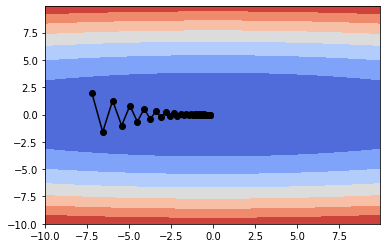

In [42]:
# 二维图像
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
x,y = np.meshgrid(x,y)
plt.contourf(x,y,f(x,y),cmap=plt.cm.coolwarm)
plt.plot(params['x'],params['y'],color='black',marker='o',linestyle='solid')
plt.show()
# 之字形，反复横跳，效率不高

## 6.1.2 Momentum
- 动量概念：类似小球在平面上运动
- αv - lr*self.grads[key]
- 有一个速度的方向 
- 解决波动过大问题

In [ ]:
class Momentum:

    def __init__(self,lr=0.01,momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] -self.lr*self.grads[key]
            self.params[key] += self.v[key] # 改变了参数更新速度
            # 本次更新速度受上次更新速度的影响
            # 同时正负更新方向会相互抵消v[key] -grads[key]

## 6.1.3 AdaGrad
- 解决：学习率过大无法收敛
- 学习率衰减算法
- h= h+梯度平方 即之前所有时刻的平方和
- 学习率η = lr/sqrt(h)
- 无穷次更新后趋于0，解决办法遗忘过去很远的梯度，RMSProp方法

In [ ]:
class AdaGrad:

    def __init__(self,lr=0.01):
        self.lr = lr
        self.h =None
    
    def update(self,params,grads):
        if self.h == None:
            self.h = {}
            for key,val in self.params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            self.params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)
        

## 6.1.4 Adam
- 损失函数优化
- 标准梯度下降：负梯度方向，全样本计算，局部最小值，鞍点，计算量大，速度慢
- 随机梯度下降：每次随机选取一个样本作为梯度的代表更新参数，波动非常大
- 批量梯度下降：每次选取100各样本进行梯度下降计算，缓解波动
- Momentum ：  解决之字形更新，波动更小，两次更新之间会对冲, 增加了速度变量
- Nestero:梯度加速法，提前减速，预测下次参数Wn=Wn-1-αVn-1，利用预测的损失函数求梯度进行更新
- AdaGrad ：学习率衰减，效率偏低，波动大于momentum
- AdaDelta: 解决AdaGrad中h过大不再更新问题，移动平均 h = βh(-1)+（1-β）grads^2 ，越远越容易被遗忘
- Adam: 对速度变量和梯度一阶矩和二阶矩做移动平均得到V1,V2,V3... 希望更新速度为历史上所有梯度的移动平均
- Adamax：一阶矩处理类似于Adam，不使用二阶矩，用历史梯度最大值来确定学习率的大小
- Nadam : Nestero+Adam ,速度变量用预测的梯度进行更新，移动平均处理不更新问题

# 6.2 权重的初始值
- 解决无效学习问题：
- 权重的初始值: 生成参数的分布的方差，会影响激活函数的分布
- 设置错误，会使激活函数趋于某几个值，随着层数增加，梯度消失，无法更新
- ReLu 激活函数 ：HE初始值  2/sqrt(n)   n为前一层神经元个数
- sigmoid和tanh(双曲线)：Xavier初始值 1/sqrt(n)   n为前一层神经元个数

# 6.3 激活值标准化
- Batch Norm解决无效学习问题
- 在隐藏层前或后放入一个标准化层即可
- 对权重初始值具有稳定性

# 6.4 正则化
- 解决过拟合
- L1、L2、L无穷进行权值衰减，防止参数过大
- Dropout:随机删除神经元，确定一个比例，类似于集成学习，随机选择了不同模型

# 6.5 超参数的验证
- 训练集、验证集、测试集划分
- 设定超参数的合理范围：如批量大小，太小不适合并行利用计算资源，太大，消耗内存
- 在验证集上进行学习，验证评估精度，epoch设置很小
- 重复上述步骤，根据上述评估结果缩小参数范围
- 选出最优的参数